# MOVIES PROJECT

necesary imports

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

framing function

In [3]:
def frame_it(list_of_pd_series):
    return pd.concat(list_of_pd_series, axis=1)

urls into responses

In [4]:
response_1_50 = requests.get('https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,asc')
response_51_100 = requests.get('https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,asc&start=51&ref_=adv_nxt')

soupify the responses

In [5]:
soup_1_50 = BeautifulSoup(response_1_50.text,'html.parser')
soup_51_100 = BeautifulSoup(response_51_100.text,'html.parser')

## RELEASE DATES

traverse the soup in search for the dates

In [6]:
movie_release_dates_1_50 = soup_1_50.findAll('span', class_='lister-item-year text-muted unbold')
movie_release_dates_51_100 = soup_51_100.findAll('span', class_= 'lister-item-year text-muted unbold')

movie_release_dates = movie_release_dates_1_50 + movie_release_dates_51_100

date cleaning function

In [7]:
def clean_date(date_string):

    # fix stupid strings
    date_string = (date_string.text).replace("(", "")
    date_string = date_string.replace(")", "")
    date_string = date_string.replace("I","")
    date_string = date_string.strip()

    # change them into integers
    date_int = int(date_string)

    return date_int

create an empty list for release dates

In [8]:
list_rel_dates = []

process dates

In [9]:
for str_date in movie_release_dates:
    list_rel_dates.append( clean_date(str_date) )

make them into pd.Series

In [10]:
rel_dates_series = pd.Series(list_rel_dates, name="Release Date")

## RUNTIMES

traverse the soup in search for runtimes

In [11]:
runtimes_1_50 = soup_1_50.findAll('span', class_="runtime")
runtimes_51_100 = soup_51_100.findAll('span', class_="runtime")

runtimes = runtimes_1_50 + runtimes_51_100

create empty lists for runtimes

In [12]:
movie_runtimes = []

create a time-cleaning function

In [13]:
def clean_time(time_string):

    time_string = time_string.split()
    time_string = time_string[0]

    return int(time_string)

process runtimes

In [14]:
for runtime in runtimes:
    movie_runtimes.append( clean_time(runtime.text) )

make them into pd.Series

In [15]:
runtimes_series = pd.Series(movie_runtimes, name="Runtime")
runtimes_series

0     117
1     119
2     103
3     128
4     136
     ... 
95     96
96    202
97    152
98    175
99    142
Name: Runtime, Length: 100, dtype: int64

## MOVIE NAMES

traverse the soup

In [16]:
movie_names_1_50 = soup_1_50.find_all(name="h3", class_="lister-item-header")
movie_names_51_100 = soup_51_100.find_all(name="h3", class_="lister-item-header")

movie_names = movie_names_1_50 + movie_names_51_100

create an empty list for movie names

In [17]:
names_list = []

process names

In [18]:
for mn in movie_names:
    names_list.append(list(mn)[3].text)

make them into pd.Series

In [19]:
names_series = pd.Series(names_list, name="Movie name")

## MOVIE TYPES

traverse the soup

In [20]:
genres_1_50 = soup_1_50.find_all(name="span", class_="genre")
genres_51_100 = soup_51_100.find_all(name="span", class_="genre")

genres = genres_1_50 + genres_51_100

create an empty list, process and serialise it

In [21]:
genres_list = []
for gen in genres:
    string = list(gen)[0].replace("\n", "").strip()
    genres_list.append(string)
genres_series = pd.Series(genres_list, name="Genre")

## RATING

traverse the soup, get stuff from it and serialise it in 2 steps

In [22]:
# <div class="inline-block ratings-imdb-rating" name="ir" data-value="8,3">
ratings = soup_1_50.find_all(name="div", attrs={'name':'ir'}) + soup_51_100.find_all(name="div", attrs={'name':'ir'})
ratings_series = pd.Series([ float(rt.text.strip()) for rt in ratings ], name="Rating")

## PROFIT!

In [23]:
all_series = [names_series, ratings_series, rel_dates_series, runtimes_series, genres_series]

df = pd.concat(all_series, axis=1)

# %timeit df.loc[df.loc[:,'Genre'].str.contains('Action')]
# %timeit df.loc[df['Genre'].str.contains('Action')]
# %timeit df.loc[ [('Action' in genre) for genre in df.loc[:,'Genre']]]
# %timeit df.loc[ [('Action' in genre) for genre in df['Genre']]]

action_df = df.loc[ [('Action' in genre) for genre in df['Genre']]]

action_df

,Movie name,Rating,Release Date,Runtime,Genre
7,Gwiezdne wojny: Część VI - Powrót Jedi,8.3,1983,131,"Action, Adventure, Fantasy"
9,Obcy - decydujące starcie,8.3,1986,137,"Action, Adventure, Sci-Fi"
29,Poszukiwacze zaginionej arki,8.4,1981,115,"Action, Adventure"
31,Księżniczka Mononoke,8.4,1997,134,"Animation, Action, Adventure"
33,Oldboy,8.4,2003,120,"Action, Drama, Mystery"
38,Mroczny Rycerz powstaje,8.4,2012,164,"Action, Adventure"
41,Avengers: Wojna bez granic,8.4,2018,149,"Action, Adventure, Sci-Fi"
42,Avengers: Koniec gry,8.4,2019,181,"Action, Adventure, Drama"
43,Spider-Man Uniwersum,8.4,2018,117,"Animation, Action, Adventure"
56,Terminator 2: Dzień sądu,8.5,1991,137,"Action, Sci-Fi"


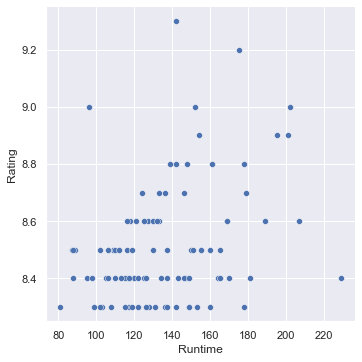

In [38]:
import seaborn as sns

lista1=[1,2,3,4]
lista2=[1.1, 5.3, 2.1, 5.4]

runt = df['Runtime']
rat = df['Rating']

sns.relplot(x=runt, y=rat)
